## 랜덤 포레스트
 -  랜덤한 결정 트리(Decision Tree)를 여러개 묶은 모델
 - 트리 < 데이터(부트스트랩 ** 중복이 될 수 있게)    

In [1]:
#119
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [3]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
cancer.target_names # 2진 분류 classification

array(['malignant', 'benign'], dtype='<U9')

In [5]:
# 결정트리 vs 랜덤 포레스트
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [7]:
y_train

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [8]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

In [9]:
dt.score(X_test,y_test), rf.score(X_test,y_test)

(0.8881118881118881, 0.972027972027972)

In [10]:
import matplotlib.pyplot as plt

<BarContainer object of 30 artists>

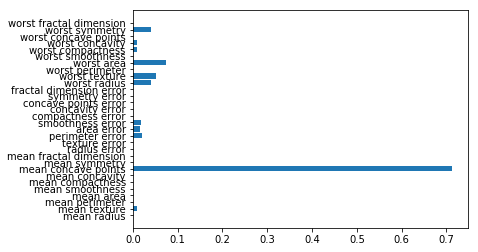

In [12]:
plt.barh(cancer.feature_names, dt.feature_importances_)

<BarContainer object of 30 artists>

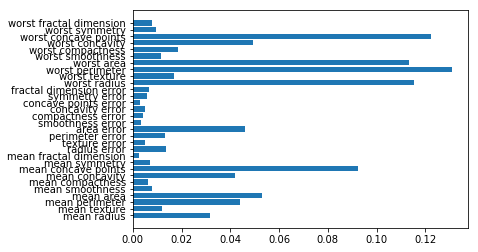

In [13]:
plt.barh(cancer.feature_names, rf.feature_importances_)

In [16]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [17]:
rf.feature_importances_

array([0.03180672, 0.01216518, 0.04412317, 0.05306274, 0.00781363,
       0.00625497, 0.04184979, 0.09246074, 0.00702776, 0.00266482,
       0.01375792, 0.00516913, 0.01328016, 0.04619451, 0.00349291,
       0.0040788 , 0.00484305, 0.00286206, 0.00561647, 0.00643089,
       0.11515303, 0.01695628, 0.13079867, 0.11336434, 0.01156374,
       0.01859416, 0.04930418, 0.12226678, 0.00935713, 0.00768628])

## 그라디언트 부스팅 회귀 트리
 - 트리 앙상블
 - 랜덤포레스트 : 여러 나무를 다른 데이터로 독립적으로 학습(병렬 가능)
 - Gradient Boosting Decision Tree : 나무 하나씩 순차적으로 학습, 이전 나무의 오류를 최소화 하는 방향으로 학습
   - 작은 나무 1~5개
   - 나무가 작다(max_depth가 작고, leaf가 적다) - 약한 학습기(weak learner)

In [20]:
#p122 보통 안정적인 랜덤 포레스트 먼저 사용, 더 성능을 높이고 싶을때 xboost 사용
from sklearn.ensemble import GradientBoostingClassifier

In [21]:
gbc = GradientBoostingClassifier(random_state=0).fit(X_train,y_train)

In [25]:
gbc.score(X_train,y_train), gbc.score(X_test,y_test)
# 과적합 > 트리를 적게 만들자 > 사전/사후 가지치기

(1.0, 0.958041958041958)

In [28]:
gbc = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train,y_train)
gbc.score(X_train,y_train), gbc.score(X_test,y_test)

(0.9906103286384976, 0.972027972027972)

In [29]:
gbc = GradientBoostingClassifier(random_state=0, max_depth=2).fit(X_train,y_train)
gbc.score(X_train,y_train), gbc.score(X_test,y_test)

(1.0, 0.972027972027972)

<BarContainer object of 30 artists>

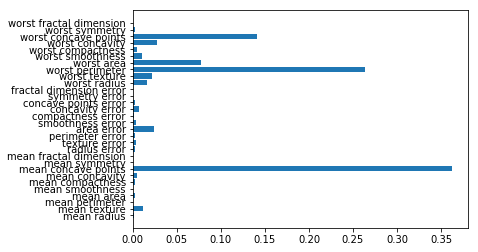

In [30]:
plt.barh(cancer.feature_names, gbc.feature_importances_)

## 131 에이다부스트 (AdaBoost) : Adaptive Boosting
- 그라디언트 부스트 트리와 비슷
- 차이 : 이전 트리의 오차를 최소화, 이전 트리의 오차 샘플에 가중치를 높여서 다음 트리에서 학습

In [32]:
#132
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier(random_state=0).fit(X_train, y_train)
adc.score(X_train,y_train), adc.score(X_test,y_test)

(1.0, 0.9790209790209791)

<BarContainer object of 30 artists>

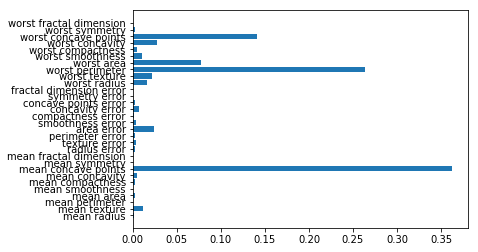

In [33]:
# 특성 중요도
plt.barh(cancer.feature_names, gbc.feature_importances_)

결정 트리 > 과적합 > 앙상블(랜덤 포레스트, 그라디언트 부스팅 or 에이다부스트)
최종 결정 : 분류 작업일 경우는 투표(다수결), 예측일 때는 평균

#134 SVM(Support Vector machine)
 139 학습 : *일부 데이터 포인트(샘플)가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 배운다.

In [46]:
#139
from sklearn.svm import SVC, SVR #SVM-C분류용, SW-R 회귀용
import mglearn

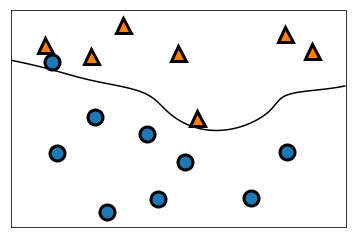

In [50]:
gamma = 1 # 하나의 샘플이 미치는 영향의 범위, 작으면 넓은 범위
c = 1 # 규제 regularization : 파라미터 값이 작아지도록 규제
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=c, gamma=gamma).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps = .5)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s =15, markeredgewidth=3)

In [52]:
sv = SVC(gamma='auto').fit(X_train, y_train)
sv.score(X_train, y_train), sv.score(X_test, y_test)

(1.0, 0.6293706293706294)

In [56]:
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

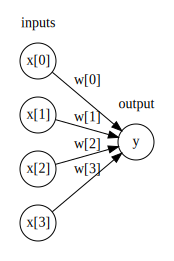

In [57]:
#logistic_regression
display(mglearn.plots.plot_logistic_regression_graph())

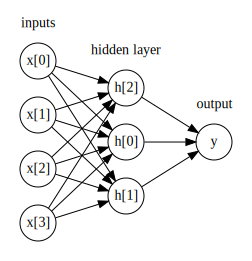

In [55]:
#신경망(neural network) : 다층 퍼셉트론 ( multilayer perceptrons )
display(mglearn.plots.plot_single_hidden_layer_graph())

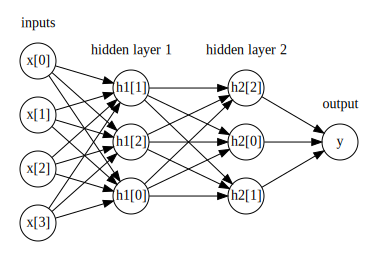

In [58]:
display(mglearn.plots.plot_two_hidden_layer_graph())
#히든레이어가 없으면 Linear/Logistic regression
#히든레이어가 1~3 면 신경망(MLP)
#2000년 이후 히든레이어가 10~100~1000 많아진 모델을 딥 뉴럴 네트워크라고 합니다.

In [59]:
#151
from sklearn.neural_network import MLPClassifier, MLPRegressor
mlp = MLPClassifier().fit(X_train, y_train)
mlp.score(X_train, y_train), mlp.score(X_test,y_test) # 과소적합 : under fitting

(0.931924882629108, 0.9440559440559441)

In [62]:
# (3,3) 히든레이어 2개에 각각 노드 3개씩
mlp = MLPClassifier(hidden_layer_sizes=(100,50,50)).fit(X_train,y_train)
mlp.score(X_train, y_train), mlp.score(X_test,y_test) 
#장점 : 모델 형태를 내 마음대로 설계, 성능 good
#단점 : 어떤 형태가 최선인가? 학습 속도가 느리고, 분석이 까다롭다.

(0.9154929577464789, 0.916083916083916)

In [ ]:
KW(예측/분류), Linear Regression(예측), Logistic Regression(분류)
Decision Tree(예측/분류), Random Forest, Gradient Boost Decision Tree, AdaBoot,
S/W(S/M-C 분류용/SW-R(예측용), MLP(뉴럴네트워크))